<a href="https://colab.research.google.com/github/VihaanS22/API-/blob/main/Final_Destination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
media = files.upload()

Saving planets_main.csv to planets_main.csv


In [ ]:
import csv

rows = []

with open("planets_main.csv") as f:
  reader = csv.reader(f)
  for i in reader:
    rows.append(i)

headers = rows[0]
planet_data_rows = rows[1:]
headers[0] = "row_num"
print(headers)
print(planet_data_rows[0])
print(len(planet_data_rows))

['row_num', 'name', 'light_years_from_earth', 'planet_mass', 'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius', 'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name', 'planet_discovery_method', 'planet_orbital_inclination', 'planet_density', 'right_ascension', 'declination', 'host_temperature', 'host_mass', 'host_radius']
['0', '11 Comae Berenices b', '305.0', '19.4 Jupiters', '4.74', '2007', 'Gas Giant', '1.08 x Jupiter', '1.29 AU', '326 days', '0.23', '11 Com', 'Radial Velocity', '', '', '12h20m43.03s', '+17d47m34.3s', '4742.0', '2.7', '19.0']
4284


In [ ]:
ss_planet_count = {}

for row in planet_data_rows:
  if ss_planet_count.get(row[11]):
    ss_planet_count[row[11]] += 1
  else:
    ss_planet_count[row[11]] = 1

max_ss_count = max(ss_planet_count, key = ss_planet_count.get)

print("{} system has the maximum number of planets i.e, {}".format(max_ss_count,ss_planet_count[max_ss_count]))

KOI-351 system has the maximum number of planets i.e, 8


In [ ]:
temp_rows = list(planet_data_rows)

for row in temp_rows:
  planet_mass = row[3]

  if planet_mass.lower() == "unknown":
    planet_data_rows.remove(row)
    continue
  else:
    value = planet_mass.split(" ")[0]
    ref = planet_mass.split(" ")[1]

    if ref == "Jupiters":
      value = float(value) * 317.83

    row[3] = value

  planet_radius = row[7]

  if planet_radius.lower() == "unknown":
    planet_data_rows.remove(row)
    continue
  else:
    value = planet_radius.split(" ")[0]
    ref = planet_radius.split(" ")[2]

    if ref == "Jupiter":
      value = float(value) * 11.2

    row[7] = value

print(len(planet_data_rows))

4251


In [ ]:
koi_planets = []

for row in planet_data_rows:
  if max_ss_count == row[11]:
    koi_planets.append(row)

print(len(koi_planets))
print(koi_planets[0])

7
['3665', 'Kepler-903 b', '2704.0', '4.7', '14.615', '2016', 'Super Earth', '2.01', 'Unknown', '10.4 days', '0.0', 'KOI-351', 'Transit', '89.2', '', '18h57m44.04s', '+49d18m18.6s', '6080.0', '1.2', '1.2']


In [ ]:
import plotly.express as px

planet_masses = []
planet_names = []

for row in koi_planets:
  planet_masses.append(row[3])
  planet_names.append(row[1])

planet_masses.append(1)
planet_names.append("Earth")

fig = px.bar(x = planet_names, y = planet_masses)
fig.show()

In [ ]:
temp_list = list(planet_data_rows)

for row in temp_list:
  if(row[1].lower() == "hd 100546 b"):
    planet_data_rows.remove(row)

planet_masses = []
planet_radii = []
planet_names = []

for row in planet_data_rows :
  planet_masses.append(row[3])
  planet_radii.append(row[7])
  planet_names.append(row[1])

planet_gravity = []

for index, name in enumerate(planet_names):
  gravity = (float(planet_masses[index]) *5.972e+24) / (float(planet_radii[index])*float(planet_radii[index]) * 6371000*6371000) * 6.674e-11
  planet_gravity.append(gravity)

fig = px.scatter(x = planet_radii, y = planet_masses, size = planet_gravity, hover_data = [planet_names])
fig.show()


In [ ]:
low_g_planets = []

for index, gravity in enumerate(planet_gravity):
  if(gravity <= 10):
    low_g_planets.append(planet_data_rows[index])

print(len(low_g_planets))

1012


In [ ]:
low_g_planets = []

for index, gravity in enumerate(planet_gravity):
  if(gravity <= 100):
    low_g_planets.append(planet_data_rows[index])

print(len(low_g_planets))

3951


In [ ]:
planet_types = []

for row in planet_data_rows:
  planet_types.append(row[6])

print(list(set(planet_types)))

['Neptune-like', 'Gas Giant', 'Super Earth', 'Terrestrial']


In [ ]:
fig = px.scatter(x = planet_radii, y = planet_masses)
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



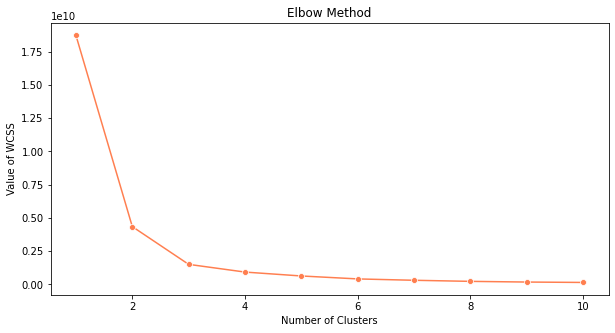

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

x = []

for index, mass in enumerate(planet_masses):
  temp_list = [planet_radii[index], mass]
  x.append(temp_list)

wcss = []

for i in range(1,11):
  k_means = KMeans(n_clusters = i, init = "k-means++", random_state = 4)
  k_means.fit(x)
  wcss.append(k_means.inertia_)

plt.figure(figsize = (10,5))
sns.lineplot(range(1, 11), wcss, marker = "o", color = "coral")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Value of WCSS")
plt.show()


In [ ]:
planet_masses = []
planet_radii = []
planet_types = []

for row in low_g_planets:
  planet_masses.append(row[3])
  planet_radii.append(row[7])
  planet_types.append(row[6])

fig = px.scatter(x = planet_radii, y = planet_masses, color = planet_types)
fig.show()

In [ ]:
suitable_planets = []

for row in low_g_planets :
  if(row[6].lower() == "terrestrial" or row[6].lower() == "super earth"):
    suitable_planets.append(row)

print(len(suitable_planets))

1452


In [ ]:
temp_rows = list(suitable_planets)

for row in temp_rows:
  if row[8].lower() == "unknown":
    suitable_planets.remove(row)

for row in suitable_planets:
  if row[9].split(" ")[1].lower() == "days":
    row[9] = float(row[9].split(" ")[0])

  else:
    row[9] = float(row[9].split(" ")[0])*365

  row[8] = float(row[8].split(" ")[0])


In [ ]:
orbital_radii = []
orbital_periods = []

for row in suitable_planets:
  orbital_radii.append(row[8])
  orbital_periods.append(row[9])

fig = px.scatter(x = orbital_radii, y = orbital_periods)
fig.show()

In [ ]:
goldilocks_planets = list(suitable_planets)
temp_rows = list(suitable_planets)

for row in temp_rows:
  if row[8] < 0.38 or row[8] > 2:
    goldilocks_planets.remove(row)

print(len(suitable_planets), len(goldilocks_planets))

696 25


In [ ]:
planet_speeds = []
for row in suitable_planets:
  distance = 2*3.14*(row[8]*1.496e+9)
  time = row[9]*86400
  speed = distance/time

  planet_speeds.append(speed)


In [ ]:
speed_supportive_planets = list(suitable_planets)

temp_rows = list(suitable_planets)

for i,row in enumerate(temp_rows):
  if planet_speeds[i] > 200:
    speed_supportive_planets.remove(row)

len(speed_supportive_planets)


8

In [ ]:
habitable_planets = []

for planet in speed_supportive_planets:
  if planet in goldilocks_planets:
    habitable_planets.append(planet)

print(len(habitable_planets))

for i in habitable_planets:
  print(i[1])



6
MOA-2007-BLG-192L b
MOA-2013-BLG-605L b
OGLE-2013-BLG-0341L B b
OGLE-2016-BLG-1195L b
OGLE-2017-BLG-1434L b
OGLE-2018-BLG-0677L b


In [ ]:
final_dict = {}

headers.append("gravity")
headers.append("speed")

for index, row in enumerate(planet_data_rows):
  features = []
  gravity = (float(row[3])*5.972e+24) / (float(row[7])*float(row[7])*6371000*6371000) * 6.674e-11
  try:
    if gravity < 100:
      features.append("gravity")
  except: pass

  try:
    if row[6].lower() == "terrestrial" or row[6].lower() == "super earth":
      features.append("Planet Type")

  except:
    pass

  try:
    if row[8] > 0.38 or row[8] < 2:
      features.append("Goldilock")

  except:
    pass

  try:
    distance = 2*3.14*(row[8]*1.496e+9)
    time = row[9]*86400
    speed = distance/time

    if speed < 200:
      features.append("Speed")

  except:
    pass

  final_dict[index] = features

print(final_dict)

{0: [], 1: [], 2: ['gravity'], 3: ['gravity'], 4: ['gravity'], 5: [], 6: ['gravity'], 7: ['gravity'], 8: ['gravity'], 9: ['gravity'], 10: [], 11: [], 12: [], 13: [], 14: ['gravity'], 15: ['gravity'], 16: [], 17: [], 18: [], 19: ['gravity'], 20: ['gravity'], 21: ['gravity'], 22: ['gravity'], 23: [], 24: ['gravity'], 25: ['gravity'], 26: ['gravity'], 27: ['gravity'], 28: ['gravity'], 29: ['gravity', 'Planet Type', 'Goldilock'], 30: ['gravity'], 31: ['gravity'], 32: ['gravity'], 33: ['gravity'], 34: ['gravity'], 35: [], 36: ['gravity'], 37: ['gravity'], 38: ['gravity'], 39: [], 40: ['gravity'], 41: ['gravity'], 42: [], 43: ['gravity'], 44: [], 45: ['gravity'], 46: [], 47: ['gravity'], 48: ['gravity'], 49: ['gravity'], 50: ['gravity'], 51: ['gravity'], 52: ['gravity'], 53: ['gravity'], 54: [], 55: ['gravity'], 56: ['gravity'], 57: ['gravity'], 58: ['gravity'], 59: [], 60: [], 61: ['gravity'], 62: ['gravity'], 63: ['gravity'], 64: ['gravity'], 65: ['gravity'], 66: [], 67: [], 68: [], 69: []

In [ ]:
gravity_count = 0
for key,value in final_dict.items():

  if "gravity" in value:
    gravity_count += 1

gravity_count

3951

In [ ]:
planet_type_count = 0
for key,value in final_dict.items():
  if "Planet Type" in value:
    planet_type_count += 1

planet_type_count

1485

In [ ]:
planet_no_gravity_supp = []
for row in planet_data_rows:
  if row not in low_g_planets:
    planet_no_gravity_supp.append(row)

type_no_gravity = 0
for row in planet_no_gravity_supp:
  if row[6].lower() == "terrestrial" or row[6].lower() == "super earth":
    type_no_gravity += 1

print(type_no_gravity)
print(planet_type_count - type_no_gravity)

33
1452


In [ ]:
goldilock_count = 0
for key,value in final_dict.items():
  if "Goldilock" in value:
    goldilock_count += 1

goldilock_count

696

In [ ]:
speed_count = 0
for key,value in final_dict.items():
  if "Speed" in value:
    speed_count += 1

speed_count

8

In [ ]:
final_dict = {}

for index, row in enumerate(planet_data_rows):
  features = []

  gravity = (float(row[3])*5.972e+24) / (float(row[7])*float(row[7])*6371000*6371000) * 6.674e-11

  try:
    if gravity<100:
      features.append("Gravity")

    row.append(gravity)
  except:
    row.append("unknown")

  try:
    if row[6].lower() == "terrestrial" or row[6].lower() == "super earth":
      features.append("Planet Type")

  except:
    pass

  try:

    if not row[8].lower() == "unknown" and float(row[8].split(" ")[0]) > 0.38 and float(row[8].split(" ")[0]) < 2:
      features.append("Goldilock")

  except:
    try:
      if row[8] > 0.38 and row[8] < 2:
        features.append("Goldilock")

    except:
      pass



  try:

    try:
      distance = 2*3.14*(float(row[8].split(" ")[0])*1.496e+9)
    except:
      try:
        distance = 2*3.14*(float(row[8])*1.496e+9)
      except:
        pass

    try:
      time,unit = row[9].split(" ")[0], row[9].split(" ")[1]

      if unit.lower() == "days" :
        time = float(time)
      else :
        time = float(time)*365

    except:
      time = row[9]

    time = time*86400
    speed = distance/time

    if speed < 200:
      features.append("Speed")
    row.append(speed)

  except:
    row.append("unknown")

  final_dict[row[1]] = features

print(final_dict)

{'11 Comae Berenices b': ['Goldilock'], '11 Ursae Minoris b': ['Goldilock'], '14 Andromedae b': ['Gravity', 'Goldilock'], '14 Herculis b': ['Gravity', 'Speed'], '16 Cygni B b': ['Gravity', 'Goldilock'], '18 Delphini b': [], '1RXS J160929.1-210524 b': ['Gravity', 'Speed'], '24 Bootis b': ['Gravity'], '24 Sextantis b': ['Gravity', 'Goldilock'], '24 Sextantis c': ['Gravity'], '2MASS J01033563-5515561 AB b': ['Speed'], '2MASS J01225093-2439505 b': ['Speed'], '2MASS J02192210-3925225 b': ['Speed'], '2MASS J04414489+2301513 b': ['Speed'], '2MASS J12073346-3932539 b': ['Gravity', 'Speed'], '2MASS J19383260+4603591 b': ['Gravity', 'Goldilock'], '2MASS J21402931+1625183 A b': ['Speed'], '2MASS J22362452+4751425 b': ['Speed'], '30 Arietis B b': ['Goldilock'], '42 Draconis b': ['Gravity', 'Goldilock'], '47 Ursae Majoris b': ['Gravity'], '47 Ursae Majoris c': ['Gravity', 'Speed'], '47 Ursae Majoris d': ['Gravity', 'Speed'], '4 Ursae Majoris b': ['Goldilock'], '51 Eridani b': ['Gravity', 'Speed'], 

In [ ]:
goldilock_count = 0
for key,value in final_dict.items():
  if "Goldilock" in value:
    goldilock_count += 1

goldilock_count

414

In [ ]:
speed_count = 0
for key,value in final_dict.items():
  if "Speed" in value:
    speed_count += 1

speed_count

507

In [ ]:
goldilock_gravity_type = 0

for key,value in final_dict.items():
  if "Goldilock" in value and "Planet Type" in value and "Gravity" in value:
    goldilock_gravity_type += 1

goldilock_gravity_type

24

In [ ]:
speed_goldilock_gravity_type = 0

for key,value in final_dict.items():
  if "Goldilock" in value and "Planet Type" in value and "Gravity" in value and "Speed" in value:
    speed_goldilock_gravity_type += 1

speed_goldilock_gravity_type

6

In [ ]:
catalog = []

for row in planet_data_rows:
  temp_dict = {

    "name" : row[1],
    "distance_from_earth" : row[2],
    "planet_mass" : row[3],
    "planet_type" : row[6],
    "planet_radius" : row[7],
    "distance_from_their_sun" : row[8],
    "orbital_period" : row[9],
    "gravity" : row[20],
    "orbital_speed" : row[21]

  }

  temp_dict["specifications"] = final_dict[row[1]]

  catalog.append(temp_dict)

print(catalog)

[{'name': '11 Comae Berenices b', 'distance_from_earth': '305.0', 'planet_mass': 6165.901999999999, 'planet_type': 'Gas Giant', 'planet_radius': 12.096, 'distance_from_their_sun': '1.29 AU', 'orbital_period': '326 days', 'gravity': 413.81273582424694, 'orbital_speed': 430.27845944103615, 'specifications': ['Goldilock']}, {'name': '11 Ursae Minoris b', 'distance_from_earth': '410.0', 'planet_mass': 4684.8142, 'planet_type': 'Gas Giant', 'planet_radius': 12.208, 'distance_from_their_sun': '1.53 AU', 'orbital_period': '1.4 years', 'gravity': 308.66978639827863, 'orbital_speed': 325.57273320287027, 'specifications': ['Goldilock']}, {'name': '14 Andromedae b', 'distance_from_earth': '247.0', 'planet_mass': 1525.5839999999998, 'planet_type': 'Gas Giant', 'planet_radius': 12.879999999999999, 'distance_from_their_sun': '0.83 AU', 'orbital_period': '185.8 days', 'gravity': 90.30154698863558, 'orbital_speed': 485.74672088665625, 'specifications': ['Gravity', 'Goldilock']}, {'name': '14 Herculis 